## **Bank Campaign Case Study**

Problem statement

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit.

**We need to apply our knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaigns.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Reading the dataset
df = pd.read_csv('bank_marketing_updated_v1.csv', dtype='str')

In [8]:
# checking the first five rows

df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Data Cleaning

### 1. Fixing the rows and columns

In [9]:
# Skipping the first 2 rows
# the first 2 rows are of now use, thet are just category labels

df = pd.read_csv('bank_marketing_updated_v1.csv', skiprows=2)

In [10]:
# dropping customer id column

df.drop('customerid', axis=1, inplace=True)

In [11]:
# dividing jobedu into 2 cols job and education

df['job'] = df.jobedu.apply(lambda x: x.split(',')[0])
df['education'] = df.jobedu.apply(lambda x: x.split(',')[1])

In [12]:
# dropping jobedu column

df.drop('jobedu', axis=1, inplace=True)

In [8]:
# extracting value of the month from the month col
# below line will give error as there are some missing values in the month col

# df.month = df.month.apply(lambda x: x.split(','))

In [13]:
# checking the missing values in the data

df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

### 2. Impute/removing the missing values

In [14]:
# handling missing values in age

# dropping records where age is missing.
df1 = df[~df.age.isnull()].copy()

In [15]:
# checking again if it contains any missing value or not

df1.age.isnull().sum()

0

In [16]:
# handling missing values in month

df1.month.isnull().sum()

50

In [17]:
# checking distribution of values in month col, normalize=True gives percent dist

df1.month.value_counts(normalize=True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [18]:
# calculating mode of the month column

month_mode = df1.month.mode()[0]
month_mode

'may, 2017'

In [19]:
# filling in missing values of month mode with month_mode

df1.month.fillna(month_mode, inplace=True)

In [20]:
# checking null values again 

df1.month.isnull().sum()

0

In [21]:
# observe pdays column
# pdays - no of days passed by since the customer has been reached via bank.
df1.pdays.describe()

# here -1 means the person is not contacted ever,
# so, -1 indicates missing value

# we want the missing values to be ignored in the calculation
# replace -1 with NaN, so it will be ignored from the summary statistics.

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [22]:
# updating -1 pday value with NaN

df1.loc[df1.pdays < 0, 'pdays'] = np.NaN

In [23]:
df1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [25]:
# response is the target var
# percent of missing values for response var

(df1.response.isnull().sum() / len(df1.response)) * 100

# it is 0.06 percent, there is no need to replace those value, it won't affect analysis

0.06638489964816004

### 3. Handling outliers 

In [26]:
# performing univariate analysis
# age

df1.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

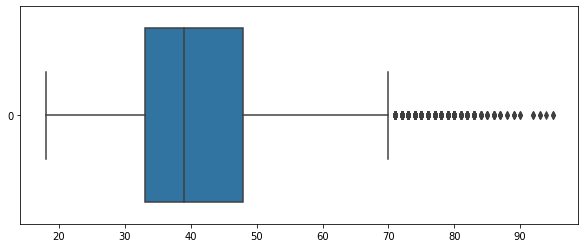

In [29]:
# plotting a box plot - age

plt.figure(figsize=(10,4))
sns.boxplot(data=df1.age, orient='h')
plt.show()

# age doesn't have outliers, as the values are scattered

In [30]:
# balance variable

df1.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

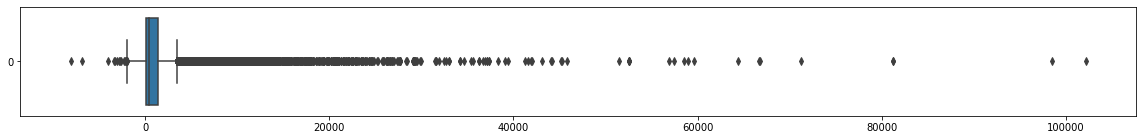

In [31]:
# plotting a box plot - balance

plt.figure(figsize=(20,2))
sns.boxplot(data=df1.balance, orient='h')
plt.show()

In [32]:
# checking balance spread

df.balance.quantile([0.5, 0.7, 0.9, 0.95, 0.99, 1])

0.50       448.0
0.70      1126.0
0.90      3574.0
0.95      5768.0
0.99     13164.9
1.00    102127.0
Name: balance, dtype: float64

In [33]:
# checking stats for customers having balance > 15000

df1[df1.balance > 15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


In [27]:
# so for balances instead of looking at the mean, we could look at the quantile/median

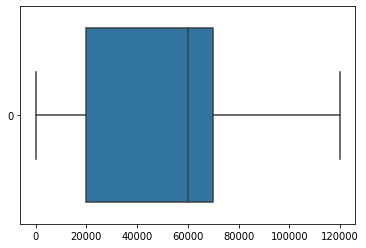

In [34]:
# Box Plot - salary plot

sns.boxplot(data=df1.salary, orient='h')
plt.show()

### 4. Standardising Value

In [35]:
# observe duration variable

df1.duration.describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [36]:
# standardising duration var
# converting secs into mins and if already in mins saving that

df1.duration = df1.duration.apply(lambda x: float(x.split()[0])/60 if x.find('sec') else x.split()[0])

In [37]:
# checking duration stats

df1.duration.describe()

count    45191.000000
mean         1.387796
std          3.077392
min          0.000000
25%          0.037222
50%          0.083333
75%          1.516667
max         64.683333
Name: duration, dtype: float64

### Univariate analysis

In [38]:
# univariate analysis on marital column (unordered)

df1.marital.value_counts()

married     27204
single      12786
divorced     5201
Name: marital, dtype: int64

In [39]:
# checking percentage

df1.marital.value_counts(normalize=True)

married     0.601978
single      0.282932
divorced    0.115089
Name: marital, dtype: float64

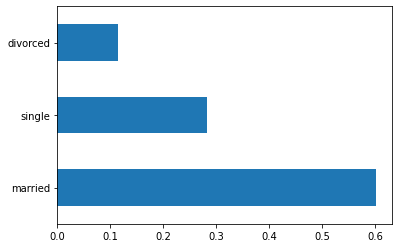

In [40]:
# plotting the distribution

df1.marital.value_counts(normalize=True).plot.barh()
plt.show()

### Univariate analysis on ordered variables

In [41]:
# univariate analysis on ordered variable
# education var

df1.education.value_counts(normalize=True)

secondary    0.513222
tertiary     0.294196
primary      0.151490
unknown      0.041092
Name: education, dtype: float64

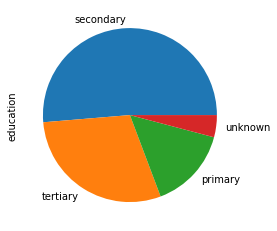

In [42]:
# a pie chart - eduaction column
# plotted using pandas's plot method

df1.education.value_counts(normalize=True).plot.pie()
plt.show()

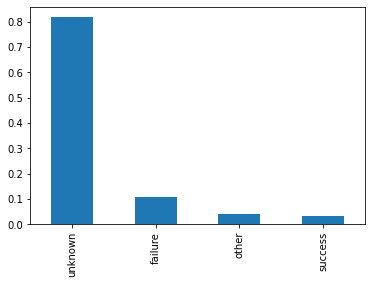

In [37]:
# Checking another var - poutcome

df1.poutcome.value_counts(normalize=True).plot.bar()
plt.show()

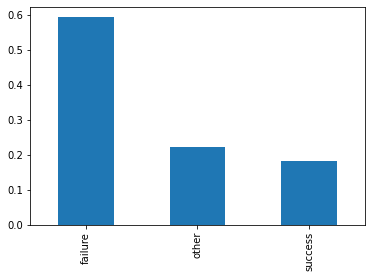

In [38]:
# for most records the campaign was not done hence the outcome is unknown.
# we will plot the dist for values other than unknown

df1[~(df1.poutcome == 'unknown')].poutcome.value_counts(normalize=True).plot.bar()
plt.show()

In [44]:
# checking the target variable - response var

df1.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

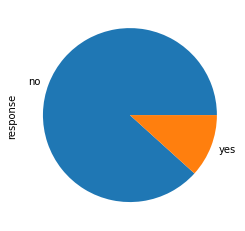

In [45]:
# plotting response var

df1.response.value_counts(normalize=True).plot.pie()
plt.show()

### **Bi-variate Analysis**

#### **Numeric-Numeric**

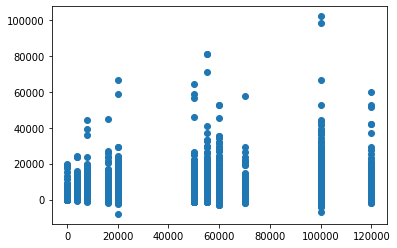

In [47]:
# Plot - salary VS balance

plt.scatter(df1.salary, df1.balance)
plt.show()

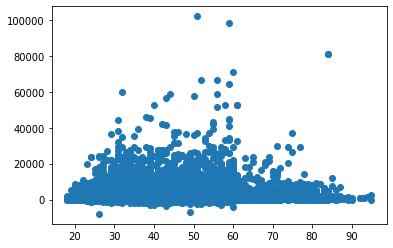

In [48]:
# Plot - Age VS balance

plt.scatter(df1.age, df1.balance)
plt.show()

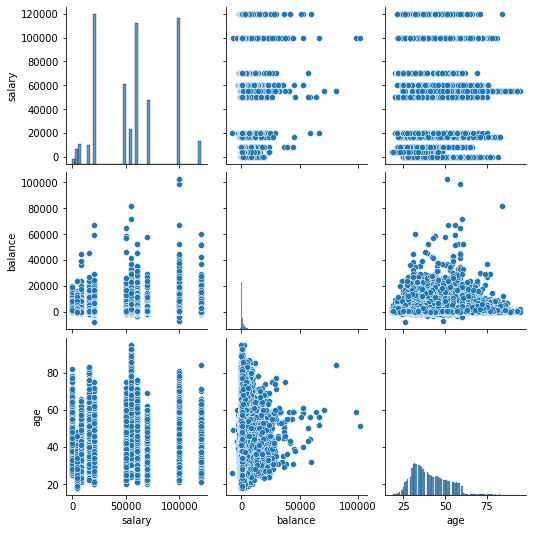

In [49]:
# pair plots - salary, balance, age

sns.pairplot(data=df1, vars=['salary', 'balance', 'age'])
plt.show()

#### Quantifying using correlation values

In [50]:
# pd method to find correlation

df1[['age', 'salary', 'balance']].corr()

,age,salary,balance
age,1.000000,0.024374,0.097755
salary,0.024374,1.000000,0.055505
balance,0.097755,0.055505,1.000000


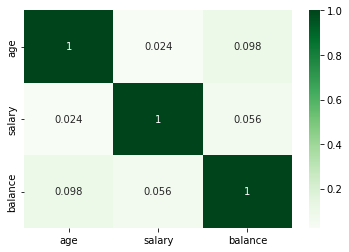

In [51]:
# heatmap - salary, balance, age depecting correlation

sns.heatmap(df1[['age', 'salary', 'balance']].corr(), annot=True, cmap='Greens')
plt.show()

#### **Numerical-Categorical**

In [53]:
# grouping response and checking salary - by mean

df1.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [54]:
# grouping response and checking salary - by median

df1.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

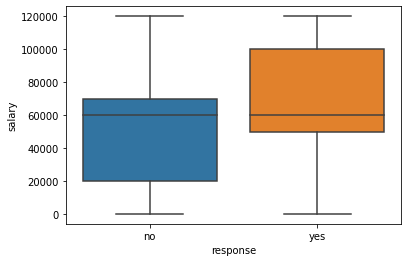

In [49]:
# as the mean and meadian are almsost same,
# we will see how the values are distributed.

sns.boxplot(data=df1, x='response', y='salary')
plt.show()

In [50]:
# here, we can observe that the values are distributed in a different manner.
# The interquartile range for customers who gave a positive response is on the higher
# salary side.

In [56]:
# response vs balance

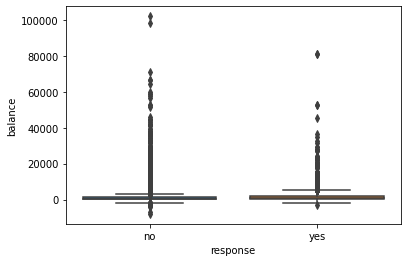

In [55]:
# checking response variable with balance
# balance is highly skewed - has very high values

sns.boxplot(data=df1, x='response', y='balance')
plt.show()

In [52]:
# response grouped by mean balance

df1.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [57]:
# response grouped by median balance

df1.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

### Here, mean is skewed due to outliers, so the quantiles would be the right choice.
### 75th percentile

In [58]:
# func to get 75th percentile

def p75(x):
    return np.quantile(x, 0.75)

In [60]:
# group by response and different aggregate fuc mean, median and 75th percentile

agg_grouped = df1.groupby('response')['balance'].aggregate(['mean', 'median', p75])
agg_grouped

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


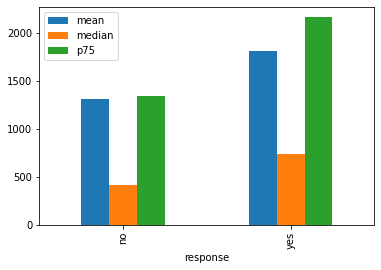

In [61]:
# Plotting bar chart on the above grouped values

agg_grouped.plot.bar()
plt.show()

It is a good practice to analyse the data using mean, median or quartiles.
the mean and median values of the balance variable are higher for customers who gave a positive response, which is again true because people who have higher balance in their bank accounts are more likely to invest in term deposits.

In [62]:
# grouping by education and salary

df1.groupby('education')['salary'].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

### Categorical-Categorical

In [63]:
# we will convert the response values into flags and then calc response rates

In [65]:
# removing null values from response
# df1 = df1[~df1.response.isnull()].copy()

# another way

df1 = df1.dropna(subset=['response'])

In [66]:
# response flag - storing the response as 1 and 0

df1['response_flag'] = df1.response.apply(lambda x: 1 if x == 'yes' else 0)

In [67]:
df1['response_flag'].value_counts()

0    39876
1     5285
Name: response_flag, dtype: int64

In [70]:
#  checking for null values again

df1['response'].value_counts(dropna=False)

no     39876
yes     5285
Name: response, dtype: int64

In [71]:
# Checking the distribution

df1['response'].value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

In [72]:
# calc mean for response flag (read next cell)

df1['response_flag'].mean()

0.1170257523084077

The response_flag mean and the percentage for yes counts in response is same.

The response flag mean is the success rate for the campaign.

Sum of the all the responses by total no of responses.
(sum of all response will result in sum of successfull response as 1 represents yes and 0 represents no)

Now, if we want to calcualte response rate of any variable,

we can use the response_flag mean with that variable.

In [73]:
# calcuating success rate based on education level

df1.groupby('education')['response_flag'].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

Here, we can observe a pattern that with the increase in level of education, the response rate is also increasing
more educated people tend to opt for term deposit more

In [74]:
# calcuating success rate based on marital status

df1.groupby('marital')['response_flag'].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

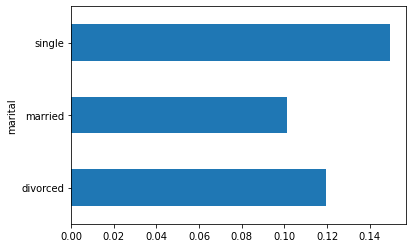

In [75]:
# Plotting horizontal bar for the response rate based on marital status

df1.groupby('marital')['response_flag'].mean().plot.barh()
plt.show()

### Single people are more likely to opt in for term deposits followed by divorced and then married

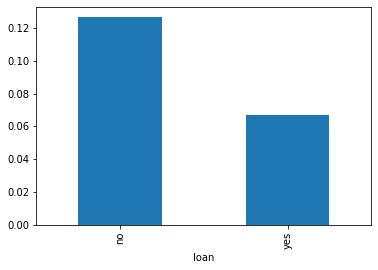

In [76]:
# calcuating success rate based on loan level

df1.groupby('loan')['response_flag'].mean().plot.bar()
plt.show()

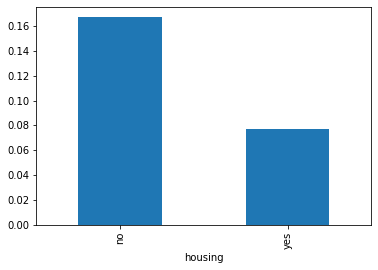

In [77]:
# calcuating success rate based on housing loan level

df1.groupby('housing')['response_flag'].mean().plot.bar()
plt.show()

### People with personal and housing loans are less likely to opt for Term deposit

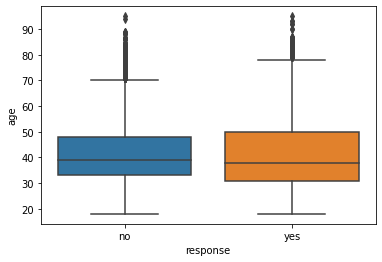

In [78]:
# calcuating success rate based on age

sns.boxplot(data=df1, x='response', y='age')
plt.show()

In [80]:
# making age buckets from age column (binning) using panda's qcut

df1['age_group'] = pd.cut(df1.age, [0,30,40,50,60,999], labels=['<30', '30-40', '40-50', '50-60', '60+'])

In [82]:
# checking distribution of the created age groups

df1['age_group'].value_counts(normalize=True)

30-40    0.391090
40-50    0.248688
50-60    0.178406
<30      0.155555
60+      0.026262
Name: age_group, dtype: float64

In [83]:
# success rate based on age group

df1.groupby('age_group')['response_flag'].mean()

age_group
<30      0.162847
30-40    0.102537
40-50    0.090731
50-60    0.100410
60+      0.423272
Name: response_flag, dtype: float64

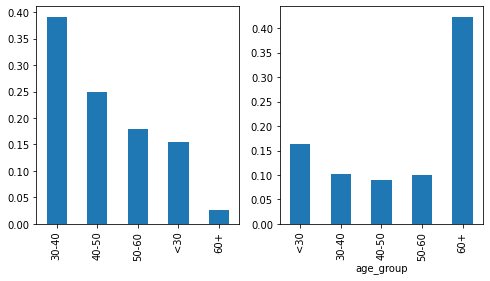

In [85]:
# plotting value counts of age group and success rate based on age group

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
df1['age_group'].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
df1.groupby(['age_group'])['response_flag'].mean().plot.bar()

plt.show()

#### From the plots, we can observe that the bank has mostly contacted people in the age group of 30-50, and have made much less contact with people in the age group of 60+ (plot-I), although the chances of getting a positive response are higher from the people who are in the age group of 50+ or 60+ (as shown in plot-II). This is a very important insight that we can conclude from this data set, i.e., the bank should target the people in the 50+ age group.

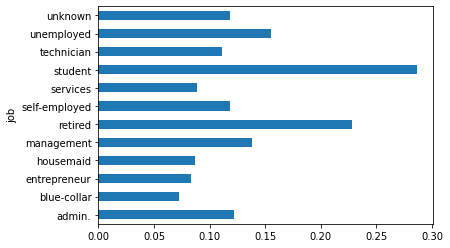

In [86]:
# success rate based on job

df1.groupby('job')['response_flag'].mean().plot.barh()
plt.show()

### **Multivariate analysis**

#### **more than 2 variables**

In [87]:
# combining education level and marital status wrt response rate

ed_mar_succ = pd.pivot_table(data=df1, index='education', columns='marital', values='response_flag')
ed_mar_succ

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


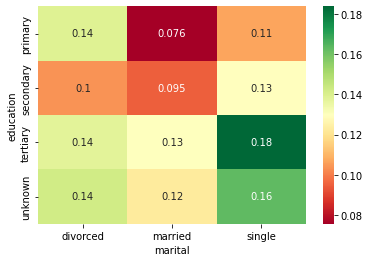

In [88]:
# heatmap for the created matrix if edu level, marital and response rate

sns.heatmap(ed_mar_succ, annot=True, cmap='RdYlGn')
plt.show()

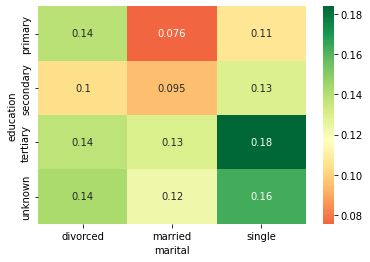

In [89]:
# passing central value overall - (success response rate)

sns.heatmap(ed_mar_succ, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

#### We can see that people who are married and who have completed just their primary education are least likely to give a positive response on term deposits. This can be explained by the fact that people educated only up to the primary level are not aware of the benefits of term investments.  Also, married individuals need money to fulfil their daily needs, and they require cash-on-hand to buy the daily essentials; hence, they won't prefer investing in term deposits.

In [90]:
# combining Job level and marital status wrt response rate

job_mar_succ = pd.pivot_table(data=df1, index='job', columns='marital', values='response_flag')
job_mar_succ

marital,divorced,married,single
job,,,
admin.,0.120160,0.113383,0.136153
blue-collar,0.077644,0.062778,0.105760
entrepreneur,0.083799,0.075843,0.113924
housemaid,0.097826,0.072527,0.166667
management,0.127928,0.126228,0.162254
retired,0.283688,0.220682,0.120370
self-employed,0.158273,0.079637,0.191874
services,0.091241,0.074105,0.117696
student,0.166667,0.185185,0.293850


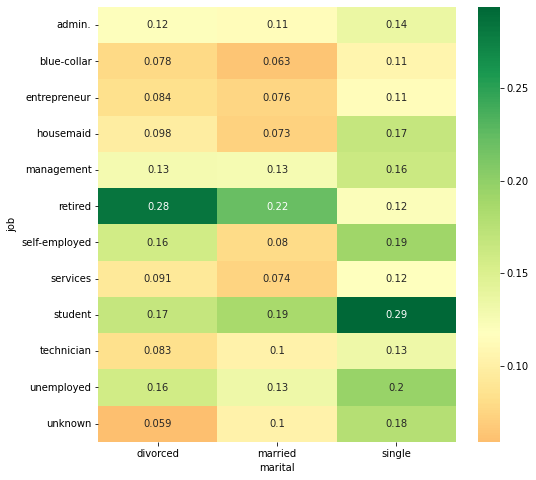

In [91]:
# plotting job, marital wrt success rate 

plt.figure(figsize=(8,8))
sns.heatmap(data=job_mar_succ, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

In [92]:
# combining Education and previous outcome wrt response rate

edu_poutcome_succ = pd.pivot_table(data=df1, index='education', columns='poutcome', values='response_flag')
edu_poutcome_succ

poutcome,failure,other,success,unknown
education,,,,
primary,0.088785,0.143443,0.609023,0.071821
secondary,0.109007,0.140831,0.641902,0.084244
tertiary,0.168683,0.220994,0.657005,0.114256
unknown,0.158192,0.200000,0.679012,0.101761


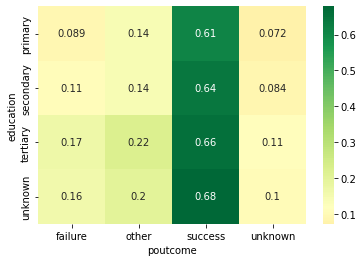

In [93]:
# plotting edu_poutcome_succ

sns.heatmap(edu_poutcome_succ, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

In [94]:
# there are some records where pdays is -1(customer is never contacted)
# as it doesn't contribute to poutcome,
# and the mean value for poutcome success is altered.
# so we will calculate the success mean where pdays is greater than 0

df1[df1.pdays > 0].response_flag.mean()

0.2307785593014795

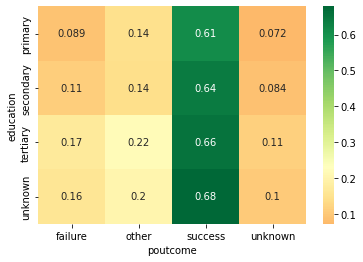

In [95]:
# we will use the above mean as central value

sns.heatmap(edu_poutcome_succ, annot=True, cmap='RdYlGn', center=0.230)
plt.show()

#### People with previous outcome are more likely to respond successfully and the response rate also increases with increase in education level.